In [1]:
import numpy as np
from matplotlib import pyplot as pl

# Zeros de Funções

Quando queremos resolver uma equação do tipo $y(x)=0$, sendo $y$ uma função contínua qualquer, temos três opções de algorítmos para implementar:

# Resolver $x³-cos(x²)=0$

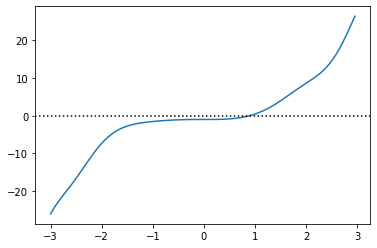

In [2]:
x=np.arange(-3, 3, 0.05)

# Aqui definimos a função y(x) que queremos resolver
def y(x):
    return x**3-np.cos(x**2)

#print(x)
#print(y(x))

# plotamos y(x) para termos uma ideia geométrica de quando y(x) = 0
pl.plot(x,y(x))
pl.axhline(y=0,ls=':',c='k')

# dá pra ver pelo plot que o zero ocorre perto de x = 0.9

### 1 - Método da Bissecção

Chutamos dois valores ($x_1$ e $x_2$), e checamos se a função $y$ tem sinais diferentes em cada ponto. Se o sinal for diferente provavelmente existe algum ponto do intervalo selecionado em que a função é zero, então tomamos a média desses pontos ($x_m$) e repetimos o mesmo procedimento comparando $x_m$ com $x_1$ e $x_2$ e atualizando os seus valores. Dada um bom chute inicial o algorítmo convergirá na resposta linearmente, e o critério de parada é quando a distância entre $x_1$ e $x_2$ estiver dentro da tolerância escolhida $e$.

In [3]:
# Função para o método da Bissecção
def Mbiss(x1,x2,y,e):
    n = 0
    # checa se os sinais de y(x1) e y(x2) são iguais
    # (se sim, provavelmente não há uma raiz em [x1,x2])
    if np.sign(y(x1)) == np.sign(y(x2)):
        return print('Não há raiz nesse intervalo!')
    else:
        print('n :','x1 -','x2 -','xm')
        # enquanto a diferença de x1 e x2 for maior que a toleância
        # continuamos o método da bisseção
        while np.abs(x1-x2) >= e:
            # calcula x médio entre x1 e x2
            xm = (x1+x2)/2
            print(n,':',x1,'-',x2,'-',xm)
            # se y(x1) e y(x2) tiverem o mesmo sinal, a raiz deve se 
            # encontrar entre xm e x2
            if np.sign(y(x1)) == np.sign(y(xm)):
                # redefinimos x1
                x1 = xm
            else:
                # senão redefinimos x2
                x2 = xm
            n = n+1
    return x1
        

#definimos os extremos do intervalo em que vamos buscar uma raiz
x1 = 0
x2 = 1
#tolerância do erro
e = 10**(-5)

#testando
Mbiss(x1,x2,y,e)

n : x1 - x2 - xm
0 : 0 - 1 - 0.5
1 : 0.5 - 1 - 0.75
2 : 0.75 - 1 - 0.875
3 : 0.875 - 1 - 0.9375
4 : 0.875 - 0.9375 - 0.90625
5 : 0.875 - 0.90625 - 0.890625
6 : 0.875 - 0.890625 - 0.8828125
7 : 0.8828125 - 0.890625 - 0.88671875
8 : 0.88671875 - 0.890625 - 0.888671875
9 : 0.888671875 - 0.890625 - 0.8896484375
10 : 0.888671875 - 0.8896484375 - 0.88916015625
11 : 0.88916015625 - 0.8896484375 - 0.889404296875
12 : 0.88916015625 - 0.889404296875 - 0.8892822265625
13 : 0.88916015625 - 0.8892822265625 - 0.88922119140625
14 : 0.88922119140625 - 0.8892822265625 - 0.889251708984375
15 : 0.889251708984375 - 0.8892822265625 - 0.8892669677734375
16 : 0.8892669677734375 - 0.8892822265625 - 0.8892745971679688


0.8892745971679688

### 2 - Método de Newton-Raphson

Neste método precisamos fornecer apenas um chute $x_0$, mas também precisamos conhecer a primeira derivada da função ($y'$). Utilizamos a derivada para estimar onde a função $y$ cruza o eixo $x$ com a seguinte lei de atualização:

$x_{n+1} = x_n - \frac{y}{y'}$

Note que quando $y(x_n) = 0$ teremos $x_{n+1} = x_n$, o que significa que encontramos o ponto em que $y = 0$. Este método garante convergência quadrática se a escolha original dos parametros satisfazer: $|e\frac{y"}{y'}| < 2$. E vai parar quando o erro relativo estiver dentro da tolerância.

In [4]:
# Método de Newton-Raphson
def MNR(x0,y,dy,e):
    n = 0
    x = x0
    print('n :','x -','y(x) -','e')
    # enquanto y(x) não explodir
    while np.abs(y(x)*e) < 1:
        print(n,':',x,'-',y(x),'-',y(x)/dy(x)/x)
        # quando o erro relativo for menor que a tolerância 
        # nós encontramos uma raiz
        if np.abs((y(x)/dy(x))/x) < e:
            return x
        # senão atualizamos x e continuamos
        else:
            x = x - y(x)/dy(x)
            n = n + 1
    # se y(x) "explodir", é porque o método não achou uma raiz
    return print('Não converge!')


# Aqui colocamos a derivada de y(x) calculada analiticamente
def dy(x):
    return 3*x**2+2*x*np.sin(x**2)
            

#chute inial e tolerância
x0 = 0.5
e = 10**(-5)

#teste
MNR(x0,y,dy,e)

n : x - y(x) - e
0 : 0.5 - -0.8439124217106447 - -1.6922179100660468
1 : 1.3461089550330234 - 2.6780426471506815 - 0.24712975221947808
2 : 1.0134453825152918 - 0.5235537163028025 - 0.10727343904411851
3 : 0.9047296110494942 - 0.057262342646478115 - 0.01675826372365031
4 : 0.8895679136289313 - 0.0010435711820104832 - 0.00032233269688374563
5 : 0.88928117680427 - 3.693225596457239e-07 - 1.1419198440640662e-07


0.88928117680427

### 3 - Método das secantes

Num problema onde não queremos perder tempo calculando a derivada, podemos mandar o computador estimar ela pra nós indicando dois pontos $x_n$ e $x_{n-1}$ e usando a aproximação $y'(x) = \frac{y(x_n) - y(x_{n-1})}{x_n - x_{n-1}}$, desta forma o próximo ponto será determinado com a regra:

$x_{n+1} = x_n - (x_n - x_{n-1})\frac{y(x_n)}{y(x_n) - y(x_{n-1})}$

Este método garante convergência de ordem $\phi$ (1.618...) se o chute inicial for bom.

In [5]:
# Método das secantes
def Msec(x0,x1,y,e):
    n = 0
    # admitindo os valores iniciais
    a = x0
    b = x1
    print('n :','x -','y(x)')
    # enquanto y(x) não explodir
    while np.abs(y(a)*e) < 1:
        print(n,':',a,'-',y(a))
        # parar se y(a) está dentro da tolerância
        if np.abs(y(a)) < e:
            return a
        else:
            # atualizar a
            a = a - (a-b)*y(a)/(y(a)-y(b))
            n = n + 1
        print(n,':',b,'-',y(b))
        # parar se y(b) está dentro da tolerância
        if np.abs(y(b)) < e:
            return b
        else:
            # atualizar b
            b = b - (b-a)*y(b)/(y(b)-y(a))
            n = n + 1
    # se y(x) explodir, não achamos uma raiz
    return print('Não converge!')


#chutes iniais e tolerância
x0 = 0.2
x1 = 1
e = 10**(-5)

#teste
Msec(x0,x1,y,e)

n : x - y(x)
0 : 0.2 - -0.9912001066609779
1 : 1 - 0.45969769413186023
2 : 0.7465306273780772 - -0.4326345302313562
3 : 0.8694216313767024 - -0.07046805136656342
4 : 0.8933329817849677 - 0.014810206365731049
5 : 0.8891803168097825 - -0.0003664025011979044
6 : 0.889280572858211 - -1.8271659952828756e-06


0.889280572858211